In [13]:
import numpy as np
import pandas as pd
from math import sqrt
import math
from random import shuffle
import random
random.seed(0)
import sys
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [14]:
#x2d, y2d_true = make_blobs(n_samples=10, centers=2, cluster_std=1, n_features=2)
c0 = [-5,  0]
c1 = [5, 0]
cc = [c0,c1]
x2d, y2d_true

(array([[ 5.56882895, -0.11816047],
        [-4.49099384, -0.44566851],
        [-5.6716827 ,  0.07397153],
        [ 1.6606012 , -2.24117695],
        [ 1.68693692, -2.85321127],
        [-6.19759194, -2.44379203],
        [ 2.39611538, -1.13326222],
        [ 3.67710737, -0.66809018],
        [-9.48475708, -1.17740246],
        [-7.28855145, -1.1020176 ]]),
 array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0]))

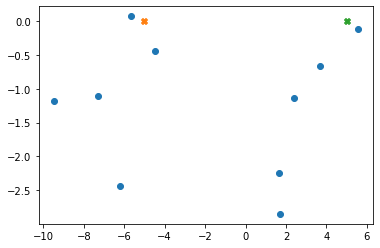

In [15]:
plt.scatter(x2d[:,0],x2d[:,1])
plt.scatter(c0[0],c0[1], marker='X')
plt.scatter(c1[0],c1[1], marker='X')

In [21]:
def cosine_distance(cc, p):
    numerator = 0
    sum_x = 0
    sum_y = 0
    for a,b in zip(cc,p):
        numerator+=sum([a*b])
        sum_x+=sum([a**2])
        sum_y += sum([b**2])
    denominator = sqrt(sum_x)*sqrt(sum_y)
    return 1 - (numerator/denominator)

In [22]:
def predict_cluster_center_cosine(centre_point, points):
    min_distance = float('inf')
    center_i = 0
    for i, c in enumerate(centre_point):
        temp_distance = cosine_distance(c, points)
        if temp_distance < min_distance:
            min_distance = temp_distance
            center_i = i
    return center_i

In [23]:
import math
n_iter = 4

print('old centres ->', cc)
for n in range(n_iter):
    print('iter ->', n)
    y_predict = {}
    clusters = {k: [] for k in range(len(cc))} #{0: [], 1: []}

    for i, x in enumerate(x2d):
        y_predict[i] = predict_cluster_center_cosine(cc, x)
        clusters[y_predict[i]].append(list(x))
        
    new_centers = [None]*len(cc)
    for i in range(len(new_centers)):
        new_centers[i] = list(np.mean(clusters[i], axis=0))

    # # check convergence
    print(new_centers)
    diff = sum(sum(abs(np.array(cc) - np.array(new_centers))))
    if diff > 0:
        centers = new_centers
    else:
        print("CONVERGED!")
        break

old centres -> [[-5, 0], [5, 0]]
iter -> 0
[[-6.626715404210411, -1.018981816742622], [2.9979179621618073, -1.4027802175399011]]
iter -> 1
[[-6.626715404210411, -1.018981816742622], [2.9979179621618073, -1.4027802175399011]]
iter -> 2
[[-6.626715404210411, -1.018981816742622], [2.9979179621618073, -1.4027802175399011]]
iter -> 3
[[-6.626715404210411, -1.018981816742622], [2.9979179621618073, -1.4027802175399011]]


In [24]:
print(y2d_true)
l = [k for val, k in y_predict.items()]
print(l)
new_centers

[1 0 0 1 1 0 1 1 0 0]
[1, 0, 0, 1, 1, 0, 1, 1, 0, 0]


[[-6.626715404210411, -1.018981816742622],
 [2.9979179621618073, -1.4027802175399011]]

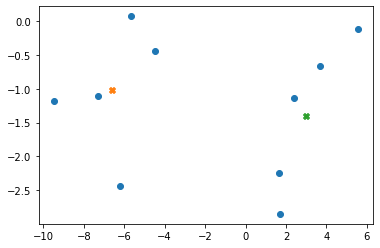

In [25]:
plt.scatter(x2d[:,0],x2d[:,1])
plt.scatter(new_centers[0][0],new_centers[0][1], marker='X')
plt.scatter(new_centers[1][0],new_centers[1][1], marker='X')